<h1 align ="center"> REST API OCR Enhanchment Samples</h1>
<hr>
   
# Chat Completions

In [3]:
import base64
import json
import os
from IPython.display import Image, display
%run shared_functions.ipynb

### Setup Parameters


Here we will load the configurations from _config.json_ file to setup vision_api_key, and vision_api_endpoint.

In [6]:
# Load config values
with open(r'config.json') as config_file:
    config_details = json.load(config_file)

# Setting up the vision resource key
vision_api_key = os.getenv("VISION_API_KEY")

# The base URL for your vision resource endpoint, e.g. "https://<your-resource-name>.cognitiveservices.azure.com"
vision_api_endpoint = config_details['VISION_API_ENDPOINT']

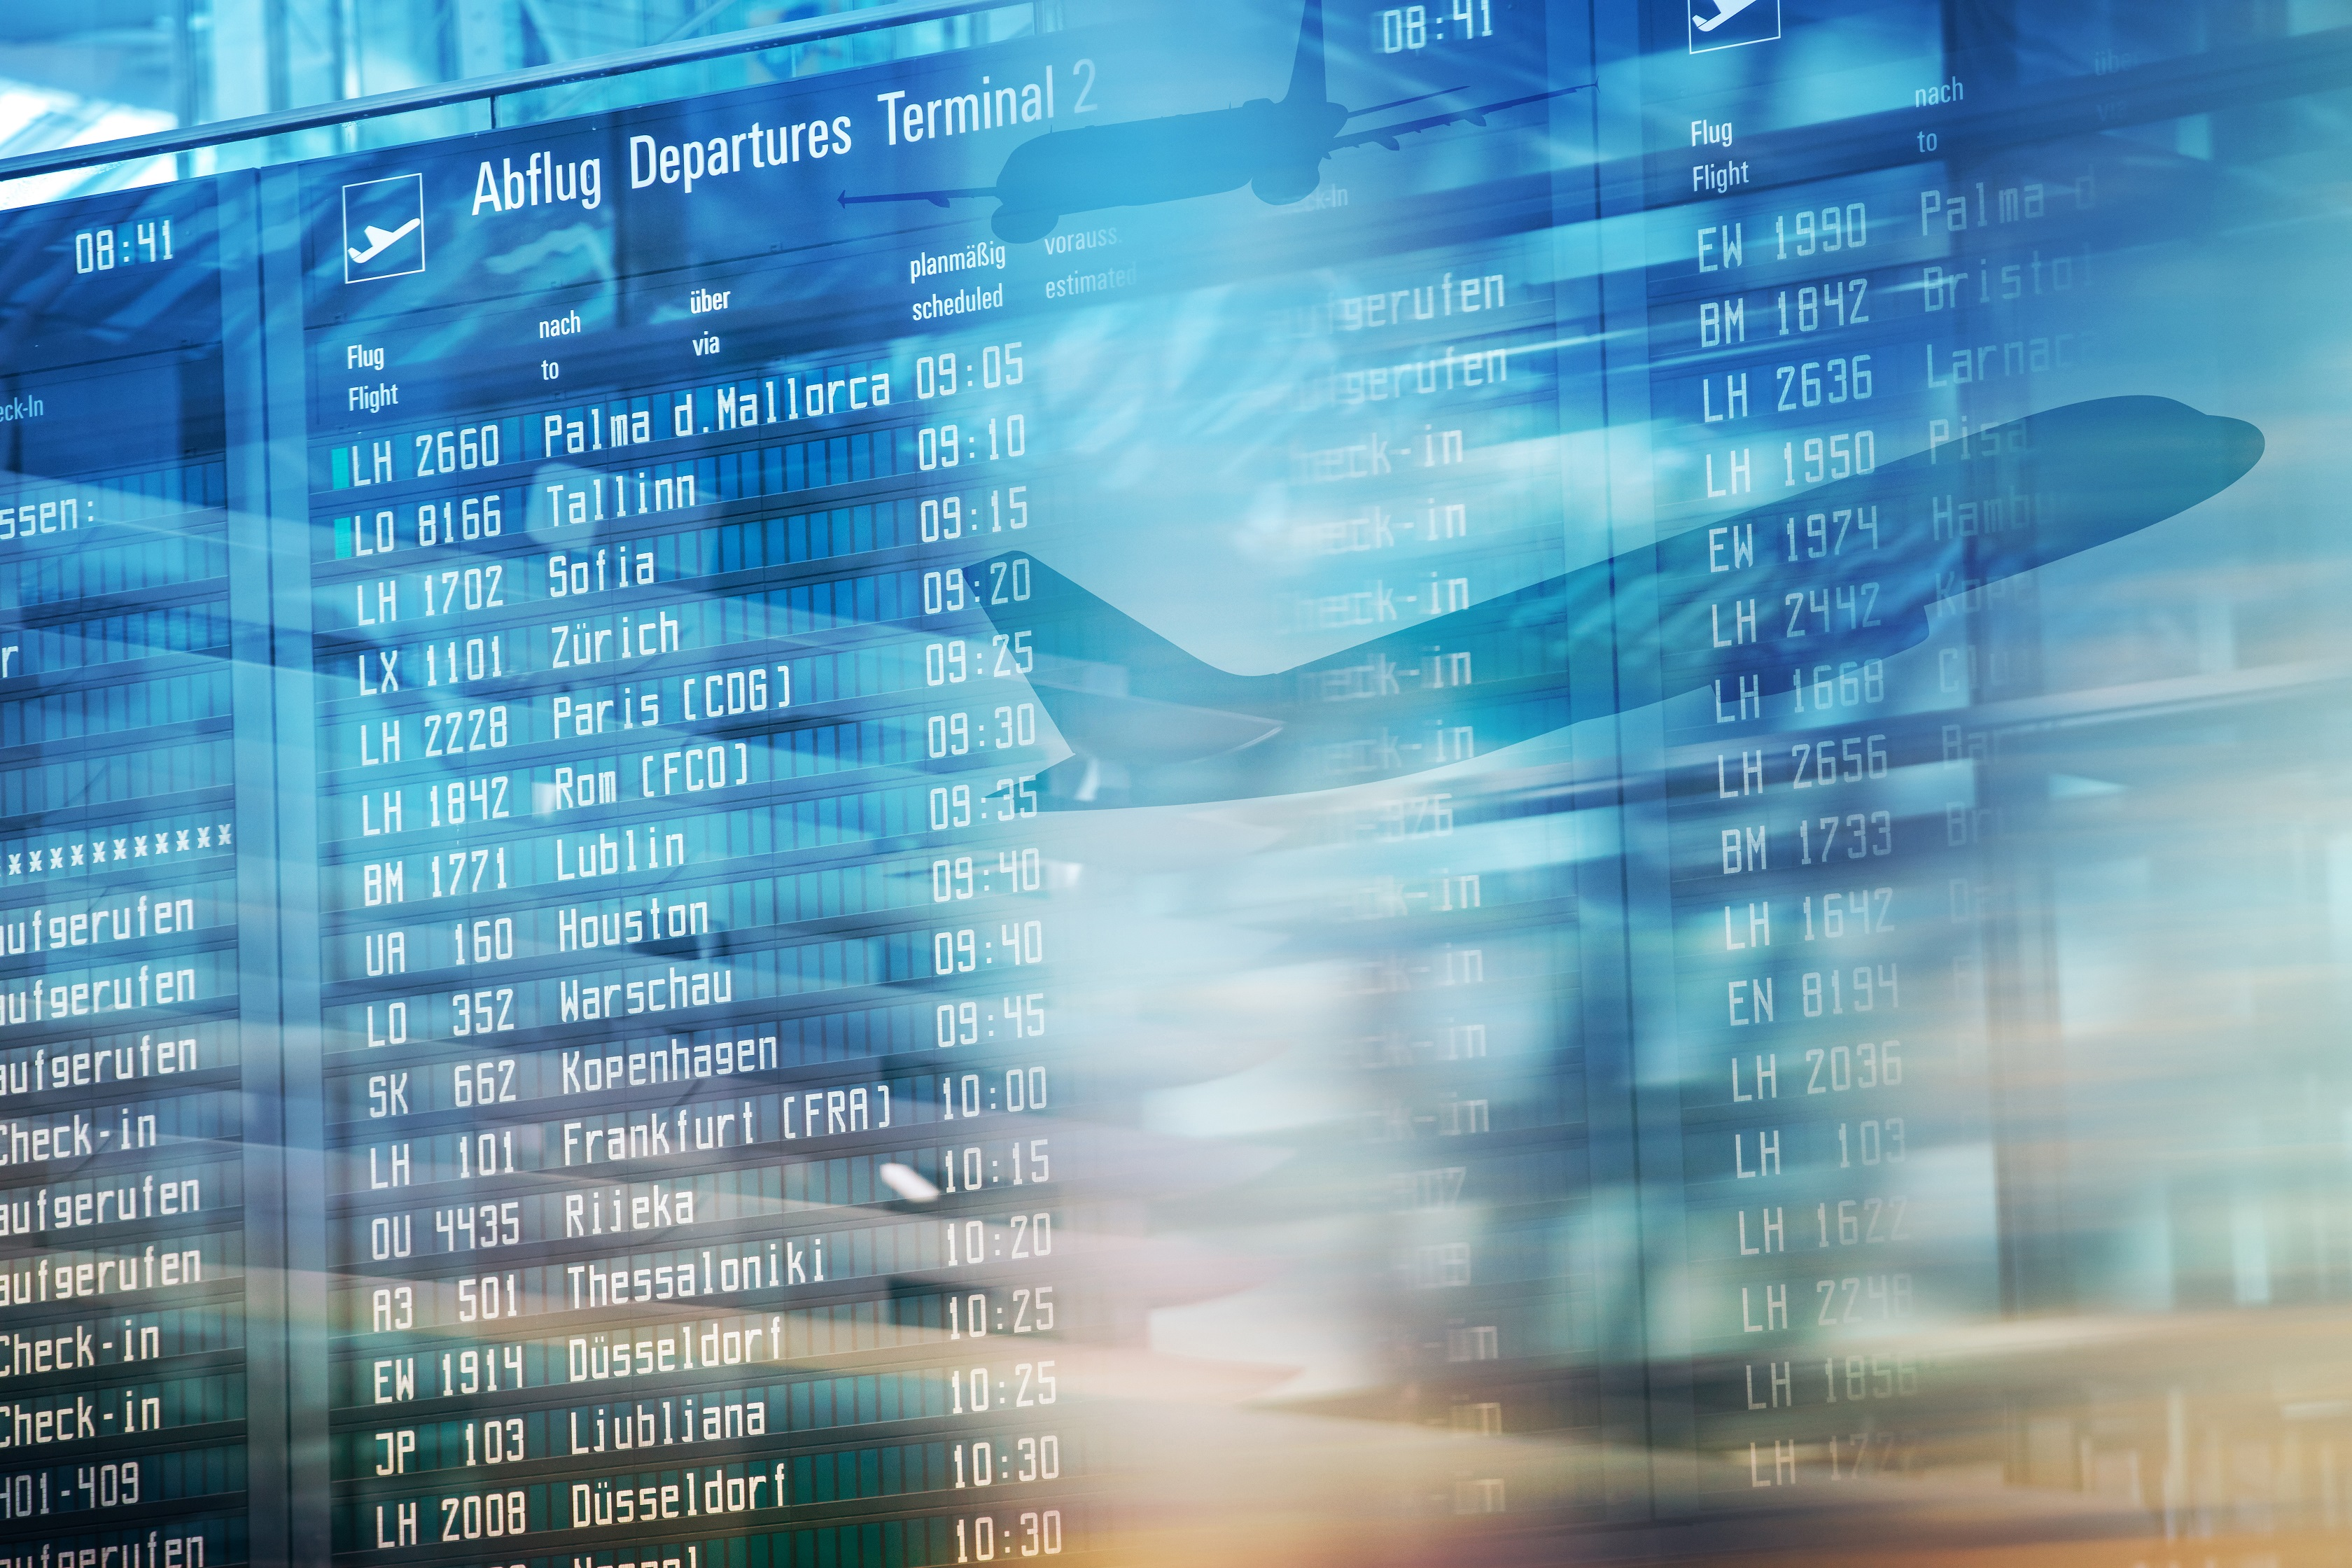

Your flight to Zurich is LX 1101. It is scheduled to depart at 09:20. The status for the flight is currently listed as "Check-in," which means you should proceed to check-in if you have not already done so. This flight is departing from Terminal 2.


In [7]:
image_file_path = "../../common/images/TravelAssistant.jpeg"  # Update with your image path
sys_message = "You are an AI assistant that helps people find information."
user_prompt = "Based on this flight information board, can you provide specifics for my trip to Zurich?"

# Encode the image in base64
with open(image_file_path, 'rb') as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode('utf-8')

messages = [
    {
      "role": "system",
      "content": [
          {
            "type": "text", 
            "text": sys_message
          }
      ]
    },
    {
      "role": "user",
      "content": [
          {
            "type": "text",
            "text": user_prompt # Prompt for the user
          },
          {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_image}" # Image to be processed
          }
          }
      ]
    }
  ]

vision_api_config = {
    "endpoint": vision_api_endpoint,
    "key": vision_api_key
}

try:
    response_content = call_GPT4V_image(messages, ocr=True, vision_api=vision_api_config)
    display(Image(image_file_path)) 
    print(response_content['choices'][0]['message']['content'])  # Print the content of the response
except Exception as e:
    raise SystemExit(f"Failed to call GPT-4V API. Error: {e}")